<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/AA_GRUPO3/blob/main/LAB01_Pr1AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo
El problema del alquiler de la vivienda ya forma parte del contexto de la mayoría de grandes ciudades del mundo. Hay varios factores que se enumeran como parte del problema: el turismo masivo, la distribución de las ciudades o el auge de los apartamentos turísticos como es el caso de AirBnB. Lo que si queda claro es que los datos obtenidos del portal sirven para obtener una radiografía más o menos valida de la ciudad. A través del dataset proporcionado en Moodle en el que se miden las estancias en los últimos años en la ciudad de New York. Hay varias preguntas que nos hacemos, que contestaremos a continuación.

# Resolución
## Apartado 1
El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York? 
 
Lo primero que tendremos que hacer es cargar todo el archivo csv en un DataFrame para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.

Para medir  la popularidad/calidad del barrio, tendremos primero  en cuenta el número de apartamentos  de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta las siguientes reglas: 

• Si Reseñas es Baja y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Media y Disponibilidad es “Poco disponible” -> “Bueno”

• Si Reseñas es Alta y Disponibilidad es “Poco disponible” -> “Muy Bueno”

• Si Reseñas es Baja y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Media y Disponibilidad es “Disponible normalmente” -> “Regular”

• Si Reseñas es Alta y Disponibilidad es “Disponible normalmente” -> “Bueno” 

• Si Reseñas es Baja y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es Media y Disponibilidad es “Altamente disponible” -> “Malo” 

• Si Reseñas es alta y Disponibilidad es “Altamente disponible” -> “Muy malo” 


In [1]:
import pandas as pd
import numpy as np
filename = 'airbnb.csv'
data = pd.read_csv(filename, sep = ',')

print(data.shape)
data.head(10)

(48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [2]:
# Eliminar los valores duplicados
data = data.drop_duplicates()

In [3]:
# Decidimos que en la columna "reviews_per_month", las casillas que esten NaN
# Las rellenaremos con un 0, ya que no ha habido ninguna revisión.
data["reviews_per_month"] = data["reviews_per_month"].replace(np.nan,0)

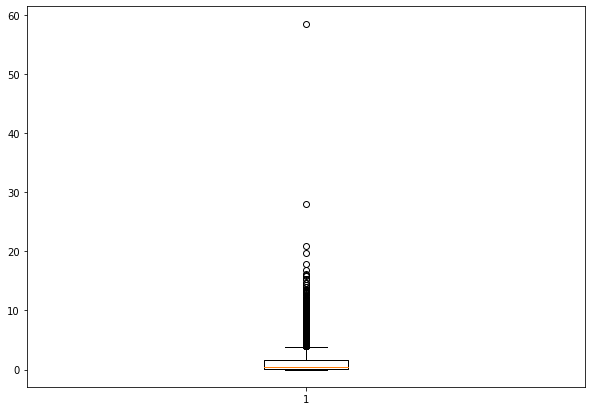

In [4]:
# Importar librerías
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
plt.boxplot(data["reviews_per_month"])
 
# Dibujar gráfico
plt.show()

<ipython-input-5-1eacbb1bafba>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max_review = data[data["reviews_per_month"]<=q3+1.5*iqr].max()["reviews_per_month"]
<ipython-input-5-1eacbb1bafba>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  min_review = data[data["reviews_per_month"]>=q1-1.5*iqr].min()["reviews_per_month"]


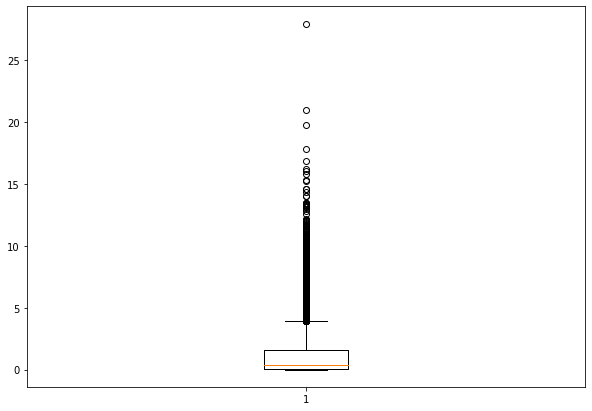

In [5]:
# Eliminar los valores anómalos (Outliers)
# Observar máximo y mínimo valor dentro del rango
q3 = np.percentile(data["reviews_per_month"],75)
q1 = np.percentile(data["reviews_per_month"],25)
iqr = q3 - q1
max_review = data[data["reviews_per_month"]<=q3+1.5*iqr].max()["reviews_per_month"]
min_review = data[data["reviews_per_month"]>=q1-1.5*iqr].min()["reviews_per_month"]


data = data.drop(data[data.reviews_per_month > 31].index)


fig = plt.figure(figsize =(10, 7))

# Crear gráfico
plt.boxplot(data["reviews_per_month"])
 
# Dibujar gráfico
plt.show()

In [6]:
from numpy.core.function_base import linspace
# Clasificar la columna "reviews_per_month" en 3 rangos iguales
# Como el mínimo es 0 y el máximo 27.95, tomamos los siguientes rangos. 
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(0,9, 901),decimals=2),"Baja")
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(9, 18, 901),decimals=2),"Media")
data["reviews_per_month"] = data["reviews_per_month"].replace(np.around(np.linspace(18, 29, 1101),decimals=2),"Alta")

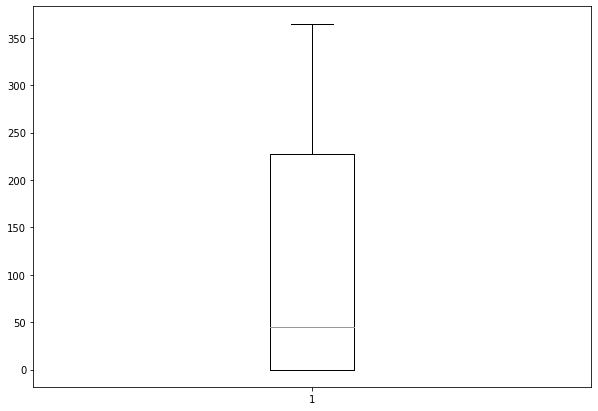

In [7]:
fig = plt.figure(figsize =(10, 7))

# Crear gráfico
plt.boxplot(data["availability_365"])
 
# Dibujar gráfico
plt.show()

In [8]:
# Clasificar la columna "availability_365" en 3 rangos iguales
# Como el mínimo es 0 y el máximo 365, tomamos los siguientes rangos.
data["availability_365"] = data["availability_365"].replace(range(0,122),"Poco disponible")
data["availability_365"] = data["availability_365"].replace(range(122,244),"Disponible normalmente")
data["availability_365"] = data["availability_365"].replace(range(243,366),"Altamente disponible")

In [9]:
# Añadimos las nuevas columnas vacías
data['calification'] = data.apply(lambda _: '', axis=1)
data['calification_num'] = data.apply(lambda _: '', axis=1)

In [10]:
# Procedemos a rellenar las columnas creadas en función de los datos de "reviews_per_month" y "availability_365".
# Asignamos un valor numérico a cada uno de los atributos Muy mal, Malo, Regular, Bueno y Muy bueno; 1, 2, 3 ,4 y 5 respectivamente. 

# Estos son Buenos
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Poco disponible"), "Bueno")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Poco disponible"), 4)

data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Disponible normalmente"), "Bueno")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Disponible normalmente"), 4)

# Estos son Muy Buenos
data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Poco disponible"), "Muy Bueno")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Poco disponible"), 5)

# Estos son Regulares
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Disponible normalmente"), "Regular")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Disponible normalmente"), 3)

# Estos son Malos
data["calification"] = data["calification"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Altamente disponible"), "Malo")
data["calification_num"] = data["calification_num"].mask(((data["reviews_per_month"] == "Baja") | (data["reviews_per_month"] == "Media")) & (data["availability_365"] == "Altamente disponible"), 2)

# Estos son Muy Malos
data["calification"] = data["calification"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Altamente disponible"), "Muy malo")
data["calification_num"] = data["calification_num"].mask((data["reviews_per_month"] == "Alta") & (data["availability_365"] == "Altamente disponible"), 1)

In [11]:
data.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,calification,calification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,Baja,6,Altamente disponible,Malo,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,Baja,2,Altamente disponible,Malo,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,Baja,1,Altamente disponible,Malo,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,Baja,1,Disponible normalmente,Regular,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,Baja,1,Poco disponible,Bueno,4
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,Baja,1,Disponible normalmente,Regular,3
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,Baja,1,Poco disponible,Bueno,4
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,Baja,1,Disponible normalmente,Regular,3
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,Baja,1,Poco disponible,Bueno,4
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,Baja,4,Disponible normalmente,Regular,3


In [12]:
data = data.astype({'calification_num': 'int'})

In [22]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                  object
calculated_host_listings_count      int64
availability_365                   object
calification                       object
calification_num                    int64
dtype: object

In [122]:
df = data.groupby(by = ["neighbourhood"]).mean()["calification_num"]
df = df.sort_values(ascending = False)
df_string = df.to_string()
print(df_string)

neighbourhood
Bay Terrace, Staten Island    4.000000
Woodrow                       4.000000
New Dorp                      4.000000
Rossville                     4.000000
New Springville               3.875000
Downtown Brooklyn             3.855422
Little Neck                   3.800000
Morningside Heights           3.791908
Navy Yard                     3.785714
Columbia St                   3.714286
Cobble Hill                   3.696970
Civic Center                  3.692308
Brooklyn Heights              3.688312
Stuyvesant Town               3.675676
Breezy Point                  3.666667
Nolita                        3.656126
Carroll Gardens               3.626609
East Village                  3.614679
Williamsburg                  3.612755
Roosevelt Island              3.610390
Emerson Hill                  3.600000
Melrose                       3.600000
Greenpoint                    3.593722
Vinegar Hill                  3.588235
Prospect Heights              3.588235
Kensington 

In [123]:
# Como vemos que la media de "calification_num" del barrio Williamsburg es 3.612755102040816
# Enumeramos los barrios según la calificación media y sacamos en qué ranking se encuentra Williamsburg
df_list = df.to_list()
for index in range(len(df_list)):
  if df_list[index] == 3.612755102040816:
    Williamsburg_index = index + 1
    Williamsburg_calification = df_list[index]
print('El barrio de Williamsburg ocupa la posición', Williamsburg_index, 'con una calificación media de', Williamsburg_calification, 'de los', index + 1, 'barrios que hay.')

El barrio de Williamsburg ocupa la posición 19 con una calificación media de 3.612755102040816 de los 221 barrios que hay.


2.- Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos 
apartamentos estén más solicitados en números absolutos). Para ello utiliza un diagrama de burbuja donde el 
eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites 
para llegar a esta conclusión final. 

In [135]:
df = data.groupby(by = ["neighbourhood"]).sum().sort_values(by = "number_of_reviews")[-5:]
df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,calification_num
neighbourhood,,,,,,,,,
Hell's Kitchen,41406631290,179336244596,79812.30335,-144875.30837,400987,15992,50227,25169,6346
Bushwick,49887640020,160903972314,100317.46664,-182213.72064,209033,14456,52514,6379,8625
Harlem,47113859448,159393456628,108488.99605,-196553.79883,316233,17050,75962,5819,9136
Williamsburg,68791112560,177535858478,159593.24651,-289891.26672,563707,24415,85427,5830,14162
Bedford-Stuyvesant,71288376210,233801887505,151112.25667,-274612.46521,399917,21130,110352,9688,12525


3.612755102040816

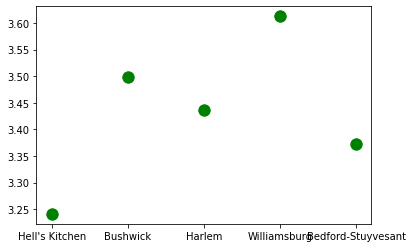

In [155]:
# Hemos localizado los 5 mejores barrios, en función del número de reseñas que tienen, ya que a mayor 
# número de reseñas, será un número mayor de veces que ha sido solicitado un apartamento.  
best5neighbourhoods = ["Hell's Kitchen", "Bushwick", "Harlem", "Williamsburg","Bedford-Stuyvesant"]
df = data.groupby(by = ["neighbourhood"]).mean()["calification_num"]
califications = df.loc[best5neighbourhoods]
plt.scatter(best5neighbourhoods, califications, s = 130, c = "green")

In [165]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,calification,calification_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,Baja,6,Altamente disponible,Malo,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,Baja,2,Altamente disponible,Malo,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,Baja,1,Altamente disponible,Malo,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,Baja,1,Disponible normalmente,Regular,3
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,Baja,1,Poco disponible,Bueno,4


3.- Una  vez  obtenida  la  información  del  apartado  anterior,  queremos  tratar  de  entender  las 
diferencias  de  precio  entre  alquilar  un  apartamento  entero  y  una  habitación  privada.  Usa  los diagramas de 
cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación 
de los resultados. 

In [201]:
# FALTAAA POR HACER ENTERO

data = data.astype({'last_review': 'str'})

4.- Por  último,  se  intuye  que  la  tendencia  a  dejar  reseñas  en  las  apps  que  prestan  servicios,  ha 
aumentado  en  los  últimos  años.  Decide  que  diagrama  es  más  útil  para  este  caso.  Dibújalo  y  realiza  una 
interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso. 

In [290]:
from numpy.ma.core import size
# Borramos de la base de datos aquellos apartamentos que no tienen ninguna reseña, ya que no los vamos a utilizar y ya no los necesitamos en más apartados 
data = data.dropna(subset = ['last_review'])

# Añadimos la nueva columna vacía 'year_last_review' y la convertimos a string para poder trabajar con ella.
data['year_last_review'] = data.apply(lambda _: '', axis=1)
data['num_year'] = data.apply(lambda _: '', axis=1)
data = data.astype({'year_last_review': 'str'})

# De esta manera, 'year_last_review' contendrá solo el año en el que se hizo la última reseña del mismo.
data['year_last_review'] = data['last_review'].str[:4]

# Convertimos dicha columna en tipo entero
data = data.astype({'year_last_review': 'int'})
# data.dtypes

# Creamos un nuevo df que contiene solo dos columnas, una con la suma y otra con el año al que pertenece dicha suma
df = data[['id', 'year_last_review']].copy()

df = df.groupby('year_last_review').count()


# Vector con los años a graficar
years = linspace(2011, 2019, 9)

# x los años y las veces que sale cada uno como última reseña
x = df.id
# x = x.to_list
x

  
# Falta por crear el histograma que represente los años en función del número de reseñas 

#plt.xlabel('Años')
#plt.ylabel('Número de reseñas')
#plt.show()



# No tiene nada que ver con este apartado pero saca mucha información jejeje :) data.describe()

year_last_review
2011        7
2012       25
2013       48
2014      199
2015     1393
2016     2707
2017     3205
2018     6050
2019    25208
Name: id, dtype: int64